## Intro

In [2]:
from IPython.display import Image, display

In this blog post, I will explain the concept of "Binomial options pricing model" for fair pricing of options. 

The binomial model is a simple and widely used model for pricing options. The model is easy to understand and implement, making it a popular choice for pricing options.

More importantly, I will go through a a simple example in Python to demonstrate how to implement the binomial model for pricing options.

## Intro to American Options 

American options are a type of financial derivative that give the **holder** the right, but not the obligation, 
to buy or sell an underlying asset at a specified price on or before a certain date.

There two types of American options:

**Call Option**: Gives the holder the right to buy the underlying asset at the strike price.

**Put Option**: Gives the holder the right to sell the underlying asset at the strike price.

## Example: American Put Option

Here is exampel of how the American Put Option works:

At day 1: the asset price is $92, 
and the strike price is $100. 
The option expires in 3 days.

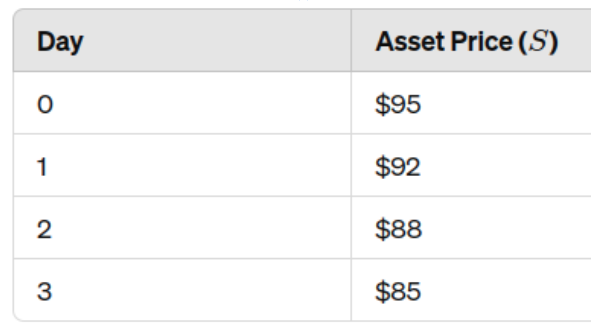

In [17]:
display(Image(filename='example.png'))

At day 1, we can calculate the exercise value as:

$$ \max (K-S_1,0)= \max(100-92, 0) = \$8 $$

Now, the option holder can see the asset at 100$ (as she has right to sell it at 100$) and 
buy back the asset at market price (say 92$).
$$Profit = \$8 - \$5 (premium)= \$3 $$

Now the the central question for Option pricing is: 
**"What is the fair value of the option? (Premium Value)"** 

### Understanding the Binomial Lattice Model


The Binomial Lattie Model is a wide-spead model for pricing options. (Finding what is the "premium" value of the option). In this approach, we create a binomial tree of possible future asset prices, with 
breaking down the time to expiration into discrete intervals.

At each time step, the price of underlying asset can move up or down by a certain factor. By the end of the model, a tree of possible asset prices is created. Then, the valeu of option is calculated at each node of the tree, starting from the end and working backwards to the present time.

## Key Parameters of the Binomial Model:
- Initial Stock Price $S_0$  : Initial price of the underlying asset
- Strike Price $K$ : The price at which the option holder can buy or sell the asset
- Expirey Time $T$ : Time to expiration of the option
- Risk-free Rate $r$ : The rate of return on a risk-free investment.
- Volatility $\sigma$ : The standard deviation of the stock return (it is a of the stock price fluctuation)
- Number of Time Steps $N$: The number of steps in the lattice model.

## Calculate the Up and Down Factor

As we mentioned, stock price can move up or down at each time step. The up and down factors are constant in whole Tree. The up and down factors are calculated as:

$$u= e ^ {\sigma  \sqrt{\frac{T}{n}}}$$

We can replace the up factor with the down factor as:
$$dt = \frac{T}{N}$$ 
$$u= e ^ {\sigma  \sqrt{dt}}$$

In [3]:
import numpy as np

expiry_time_val = 1
num_time_steps_val = 50
volatility_val = 0.2

# Time step
dt = expiry_time_val / num_time_steps_val

# Up factor
u = np.exp(volatility_val * np.sqrt(dt))

# down factor
d = 1 / u

## Calculating the Probability of Up and Down Movements 

Now that we found the $u$ factor, we need to the "probability" of up factor. I refer to the classic No-arbitrat and risk-neutral probbaility concept to undertand the detail of these equatiosn.

$$qu + d(1-q)=e^{\frac{rT}{N}}$$
$$q(u-d)=e^{\frac{rT}{N}}-d$$
$$q=\frac{e^{\frac{rT}{N}}-d}{u-d} = \frac{e^{rdt}-d}{u-d}  $$

Having defined the q value based on the $u$, $d$ and riks-free rate $r$, we can write q as :

In [4]:
risk_free_rate_val = 0.06

q = (np.exp(risk_free_rate_val * dt) - d) / (u - d)

## Forming the Binomial Tree

Having found the $q$ and $u$ and $d=1/u$ we can fully define the binomila lattice model as the figure below:

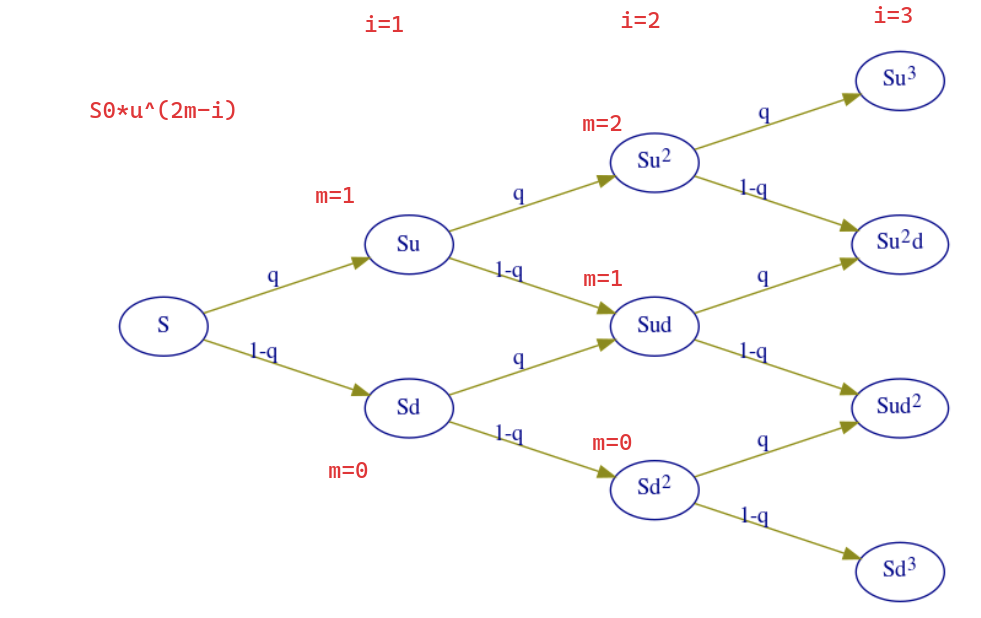

In [30]:
display(Image(filename='formingBin.png'))

Note that in the above lattice, the $i$ are time steps, while the $m$ are the nodes inside that time steps.
The equation for price at each node can be written as:

$$S_0 \times u^{(2m-i)}$$

Where $i$ is the time steps, $m < i$ is the nodes in that time step. For example, at time step $i=2$, the following prices:

$$i=2:$$

$$S_0 \times u^{(2\times 0-2)} = S_0 \times u^{(-2)} = S_0 \times (\frac{1}{u})^2 = S_0  d^2$$
$$S_0 \times u^{(2\times 1-2)} = S_0 \times u^{0} = S_0$$ 
$$S_0 \times u^{(2\times 2-2)} = S_0 \times u^{(2)} = S_0  u^{2} $$


### Calculating the Option Value at last time step (End of the Tree)

The way we work in Binomial option pricing model is to start from the end of the tree and work backwards to the present time.

So, I divide the codes to two steps:

- Step 1: Calculate the option value at the end of the tree
- Step 2: Calculate the option value at each node of the tree, starting from the end and working backwards to the present time.


### Step 1: Calculate the option value at the end of the tree

At the end of the tree, the option value is simply the max value of (exercise value of the option, 0). For a put option, the exercise value is:

$$ \max (K-S_{node},0)$$

Where $K$ is the strike price and $S_{node}$ is the asset price at the node (here all nodes at the end of the tree).

In [17]:
strike_price_val = 40 
initial_stock_price_val = 36
num_time_steps_val = 50

lattice_node_val = {}

for m in range(num_time_steps_val + 1):

        S_node = initial_stock_price_val * (u ** (2 * m - num_time_steps_val))

        lattice_node_val[(num_time_steps_val, m)] = max(strike_price_val - S_node, 0)
        


lattice_node_val

{(50, 0): 31.247797560368273,
 (50, 1): 30.738426870932294,
 (50, 2): 30.19941124343117,
 (50, 3): 29.629025367847838,
 (50, 4): 29.02544352259922,
 (50, 5): 28.386733730669068,
 (50, 6): 27.71085157563272,
 (50, 7): 26.995633657779756,
 (50, 8): 26.238790669388656,
 (50, 9): 25.437900066988323,
 (50, 10): 24.590398317151525,
 (50, 11): 23.69357269100015,
 (50, 12): 22.74455258115767,
 (50, 13): 21.740300313355714,
 (50, 14): 20.677601423283964,
 (50, 15): 19.553054367561067,
 (50, 16): 18.363059635892863,
 (50, 17): 17.103808229567512,
 (50, 18): 15.771269469408956,
 (50, 19): 14.361178094163645,
 (50, 20): 12.869020608024456,
 (50, 21): 11.290020833592209,
 (50, 22): 9.619124624031834,
 (50, 23): 7.850983685489211,
 (50, 24): 5.979938457986471,
 (50, 25): 4.0,
 (50, 26): 1.9048308187365421,
 (50, 27): 0,
 (50, 28): 0,
 (50, 29): 0,
 (50, 30): 0,
 (50, 31): 0,
 (50, 32): 0,
 (50, 33): 0,
 (50, 34): 0,
 (50, 35): 0,
 (50, 36): 0,
 (50, 37): 0,
 (50, 38): 0,
 (50, 39): 0,
 (50, 40): 0,


### Step 2: Calculate the option value at each node of the tree, starting from the end and working backwards to the present time.

At each node of the tree, the option value is the discounted expected value of the option at the next time step. The expected value is calculated as:

$$\text{continuing value} = e^{-r \times dt} \times (q \times \text{Nodevalue {up}} + (1-q) \times \text{Nodevalue {down}})$$

Where $OptionValue_{up}$ and $OptionValue_{down}$ are the option values at the next time step for the up and down movements, respectively.

In [18]:
for k in range(num_time_steps_val - 1, -1, -1):
        for m in range(k + 1):

            cont_value = np.exp(-risk_free_rate_val * dt) * (q * lattice_node_val[(k + 1, m + 1)] + 
                                                               (1 - q) * lattice_node_val[(k + 1, m)])
            
            S_node = initial_stock_price_val * (u ** (2 * m - k))
            
            exercise_value = max((strike_price_val - S_node), 0)
            
            lattice_node_val[(k, m)] = max(cont_value, exercise_value)


4.484498062854176

The option price is given by the value of the option at the root node of the lattice.

In [21]:
print(f"The option price using Binomial Lattice Method is: {lattice_node_val[0, 0]:.2f}")

The option price using Binomial Lattice Method is: 4.48
